<http://www.atmarkit.co.jp/ait/articles/1307/11/news009.html>
# ITエンジニアのためのデータサイエンティスト養成講座（4）

ログを分析するには？ XMLデータを分析するには？ pandasでデータを分析できる状態にする (1/3)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#CSVデータの読み込み（電力の使用状況データ）
df = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-2013.csv', 
                skiprows=3, names=['date', 'time', 'actual'], encoding='Shift_JIS')  #3行読み飛ばし、列名指定、文字コード指定

In [3]:
df.head(5)

,date,time,actual
0,2013/1/1,0:00,2873
1,2013/1/1,1:00,2716
2,2013/1/1,2:00,2592
3,2013/1/1,3:00,2482
4,2013/1/1,4:00,2412


In [4]:
#日付と時間を連結して時系列データを作成
idx = pd.to_datetime(df['date'] + " " + df["time"])  

In [5]:
idx.head(5)

0   2013-01-01 00:00:00
1   2013-01-01 01:00:00
2   2013-01-01 02:00:00
3   2013-01-01 03:00:00
4   2013-01-01 04:00:00
dtype: datetime64[ns]

In [6]:
#時系列インデックスを持つ、1次元データ(Series)を生成
ts = pd.Series(df["actual"].values, index=idx)

In [7]:
ts.head(30)

2013-01-01 00:00:00    2873
2013-01-01 01:00:00    2716
2013-01-01 02:00:00    2592
2013-01-01 03:00:00    2482
2013-01-01 04:00:00    2412
2013-01-01 05:00:00    2405
2013-01-01 06:00:00    2499
2013-01-01 07:00:00    2646
2013-01-01 08:00:00    2778
2013-01-01 09:00:00    2773
2013-01-01 10:00:00    2657
2013-01-01 11:00:00    2554
2013-01-01 12:00:00    2485
2013-01-01 13:00:00    2431
2013-01-01 14:00:00    2402
2013-01-01 15:00:00    2445
2013-01-01 16:00:00    2697
2013-01-01 17:00:00    3041
2013-01-01 18:00:00    3117
2013-01-01 19:00:00    3119
2013-01-01 20:00:00    3132
2013-01-01 21:00:00    3103
2013-01-01 22:00:00    2993
2013-01-01 23:00:00    2871
2013-01-02 00:00:00    2663
2013-01-02 01:00:00    2514
2013-01-02 02:00:00    2414
2013-01-02 03:00:00    2337
2013-01-02 04:00:00    2295
2013-01-02 05:00:00    2335
dtype: int64

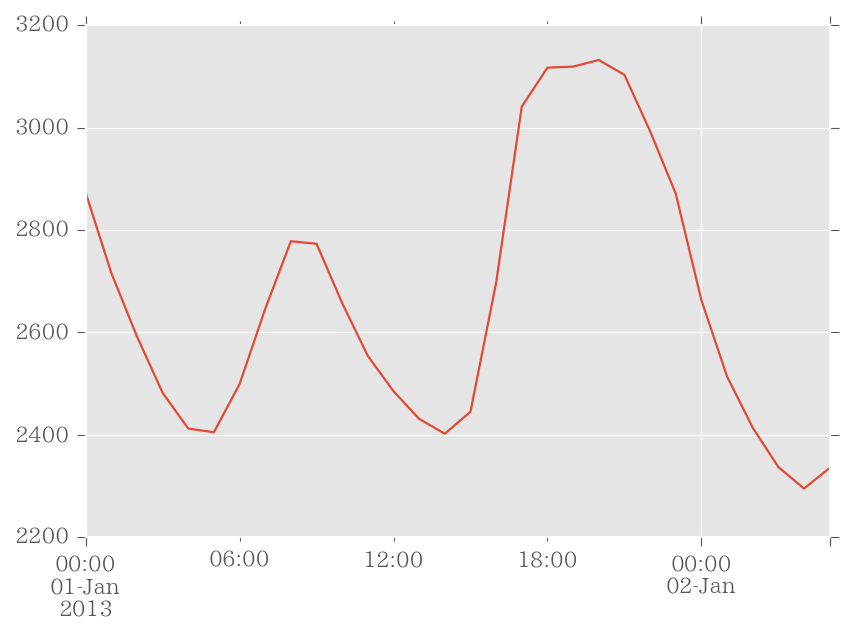

In [8]:
#先頭30件をplotしてみる (1月1日0時から1月2日5時)
ts.head(30).plot()

In [9]:
# ダウンサンプリングして日次データ月次データに変換
# kind=periodで、期間のindexで出力する（月次が2013-01になる)
# kind=timestampとすると、timestampのindexで出力される。（periodでの1月のデータは2013-01-31となる）
dav = ts.resample('D', how='mean', kind='period')  # 日次で平均ををとる
mav = ts.resample('M', how='mean', kind='period') # 月次で平均ををとる
print(dav.head())
print(mav.head())

2013-01-01    2717.625000
2013-01-02    2679.375000
2013-01-03    2871.458333
2013-01-04    3305.041667
2013-01-05    3462.083333
Freq: D, dtype: float64
2013-01    3632.861559
2013-02    3674.470238
2013-03    3131.790323
2013-04    2966.729167
2013-05    2870.169355
Freq: M, dtype: float64


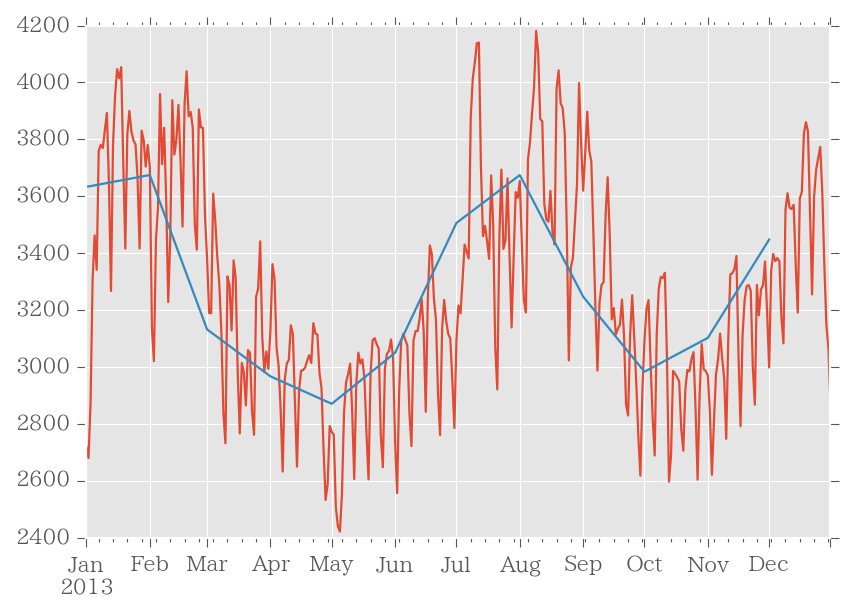

In [10]:
#plot してみる
dav.plot()
mav.plot()

In [11]:
print(ts.head())
#1時間ごとのデータを30分ごとのデータに補完する（アップサンプリング）
print(ts.head().resample('30min', fill_method='ffill'))  #ffillは前のデータで補完
print(ts.head().resample('30min', fill_method='bfill'))  #bfillは次のデータで補完

2013-01-01 00:00:00    2873
2013-01-01 01:00:00    2716
2013-01-01 02:00:00    2592
2013-01-01 03:00:00    2482
2013-01-01 04:00:00    2412
dtype: int64
2013-01-01 00:00:00    2873
2013-01-01 00:30:00    2873
2013-01-01 01:00:00    2716
2013-01-01 01:30:00    2716
2013-01-01 02:00:00    2592
2013-01-01 02:30:00    2592
2013-01-01 03:00:00    2482
2013-01-01 03:30:00    2482
2013-01-01 04:00:00    2412
Freq: 30T, dtype: int64
2013-01-01 00:00:00    2873
2013-01-01 00:30:00    2716
2013-01-01 01:00:00    2716
2013-01-01 01:30:00    2592
2013-01-01 02:00:00    2592
2013-01-01 02:30:00    2482
2013-01-01 03:00:00    2482
2013-01-01 03:30:00    2412
2013-01-01 04:00:00    2412
Freq: 30T, dtype: int64


In [12]:
#前後の平均値で線形に補完
d = pd.Series.interpolate(ts.head().resample('30min'),  method='linear') 
d

2013-01-01 00:00:00    2873.0
2013-01-01 00:30:00    2794.5
2013-01-01 01:00:00    2716.0
2013-01-01 01:30:00    2654.0
2013-01-01 02:00:00    2592.0
2013-01-01 02:30:00    2537.0
2013-01-01 03:00:00    2482.0
2013-01-01 03:30:00    2447.0
2013-01-01 04:00:00    2412.0
Freq: 30T, dtype: float64

In [20]:
#時系列インデックスでactual列を持つデータフレームdf_leftを作成
df_left = pd.DataFrame(df["actual"].values, index=idx, columns=['actual'])
df_left.head()

,actual
2013-01-01 00:00:00,2873
2013-01-01 01:00:00,2716
2013-01-01 02:00:00,2592
2013-01-01 03:00:00,2482
2013-01-01 04:00:00,2412


In [21]:
#同じ時系列インデックスでランダムな値を持つデータフレームdf_right作成
df_right = pd.DataFrame(np.random.randn(len(idx)), index=idx, columns=['rand'])
df_right.head()

,rand
2013-01-01 00:00:00,0.144451
2013-01-01 01:00:00,-0.522490
2013-01-01 02:00:00,0.383109
2013-01-01 03:00:00,-1.198845
2013-01-01 04:00:00,0.363972


In [36]:
# 同一の時系列インデックスをもつ2つのデータフレームをを結合
pd.merge(df_left, df_right, left_index=True,  right_index=True, how="inner").head()

,actual,rand
2013-01-01 00:00:00,2873,0.144451
2013-01-01 01:00:00,2716,-0.522490
2013-01-01 02:00:00,2592,0.383109
2013-01-01 03:00:00,2482,-1.198845
2013-01-01 04:00:00,2412,0.363972


In [16]:
#0-dfの要素数のランダム値を10個生成(インデックスに使用)
samples = np.random.randint(0, len(df), size=10)

In [17]:
samples

array([3819, 3789, 8348,  978, 2240, 4680, 7949, 5076, 1639, 1579])

In [18]:
df.take(samples) #dfから指定したインデックスの要素を抽出

,date,time,actual
3819,2013/6/9,3:00,2281
3789,2013/6/7,21:00,3080
8348,2013/12/14,20:00,3725
978,2013/2/10,18:00,3749
2240,2013/4/4,8:00,3152
4680,2013/7/15,0:00,2995
7949,2013/11/28,5:00,2755
5076,2013/7/31,12:00,4094
1639,2013/3/10,7:00,2469
1579,2013/3/7,19:00,3633
